In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyspotstream.eval import ResourceMonitor

In [46]:
np.logspace(1, 2.5, 5, dtype=int)

array([ 10,  23,  56, 133, 316])

In [52]:
res = []
for n in np.logspace(1, 3, 7, dtype=int):
    rm = ResourceMonitor(f"Matrix Multiply ({n}x{n})")
    for rep in range(250): # Replications
        with rm:
            X = np.random.uniform(size=(n, n))
            Y = np.random.uniform(size=(n, n))
            Z = np.dot(X, Y)
        res.append(rm.result())

Merge results into a `DataFrame` and describe them.

In [53]:
df = pd.DataFrame(res)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,1750.0,1.028725e-02,2.018128e-02,0.00002,0.000054,0.000512,8.640893e-03,1.135258e-01
memory,1750.0,4.369084e+06,8.199877e+06,2788.00000,11060.000000,240476.000000,5.167580e+06,2.400048e+07


In [54]:
df.groupby("name").describe()

time                                          \
                             count      mean       std       min       25%   
name                                                                         
Matrix Multiply (1000x1000)  250.0  0.057795  0.010553  0.042512  0.050781   
Matrix Multiply (100x100)    250.0  0.000901  0.001254  0.000380  0.000493   
Matrix Multiply (10x10)      250.0  0.000033  0.000047  0.000020  0.000021   
Matrix Multiply (215x215)    250.0  0.002649  0.002304  0.001620  0.001926   
Matrix Multiply (21x21)      250.0  0.000043  0.000039  0.000026  0.000027   
Matrix Multiply (464x464)    250.0  0.010534  0.003658  0.007667  0.008582   
Matrix Multiply (46x46)      250.0  0.000056  0.000004  0.000053  0.000054   

                                                          memory  \
                                  50%       75%       max  count   
name                                                               
Matrix Multiply (1000x1000)  0.054605  0.061133  0.113526  250.0   
Matrix Multiply (100x100)    0.000510  0.000550  0.010842  250.0   
Matrix Multiply (10x10)      0.000022  0.000023  0.000519  250.0   
Matrix Multiply (215x215)    0.001979  0.002318  0.022092  250.0   
Matrix Multiply (21x21)      0.000028  0.000059  0.000517  250.0   
Matrix Multiply (464x464)    0.009124  0.010834  0.034378  250.0   
Matrix Multiply (46x46)      0.000054  0.000055  0.000074  250.0   

                                                                               \
                                     mean         std         min         25%   
name                                                                            
Matrix Multiply (1000x1000)  2.400048e+07    0.921532  24000476.0  24000476.0   
Matrix Multiply (100x100)    2.404760e+05    0.000000    240476.0    240476.0   
Matrix Multiply (10x10)      2.869132e+03  227.237175      2788.0      2788.0   
Matrix Multiply (215x215)    1.109876e+06    0.252982   1109876.0   1109876.0   
Matrix Multiply (21x21)      1.105175e+04   39.993630     10972.0     11060.0   
Matrix Multiply (464x464)    5.167580e+06    0.357052   5167580.0   5167580.0   
Matrix Multiply (46x46)      5.126000e+04    0.000000     51260.0     51260.0   

                                                                 
                                    50%         75%         max  
name                                                             
Matrix Multiply (1000x1000)  24000476.0  24000476.0  24000480.0  
Matrix Multiply (100x100)      240476.0    240476.0    240476.0  
Matrix Multiply (10x10)          2876.0      2876.0      6099.0  
Matrix Multiply (215x215)     1109876.0   1109876.0   1109880.0  
Matrix Multiply (21x21)         11060.0     11060.0     11541.0  
Matrix Multiply (464x464)     5167580.0   5167580.0   5167584.0  
Matrix Multiply (46x46)         51260.0     51260.0     51260.0

Plot results.

In [55]:
def plotResourceUsage(df):
    fig, (ax_t, ax_m) = plt.subplots(nrows=2, figsize=(12, 5))
    ax_t.set_ylabel("Time [s]")    
    ax_m.set_ylabel("Memory [b]")
    
    for name, ss in df.groupby("name"):
        ss = ss.reset_index(drop=True)
        ax_t.plot(ss["time"], ".", label=name)
        ax_m.plot(ss["memory"], ".", label=name)
    ax_t.legend()
    return fig, ax_t, ax_m

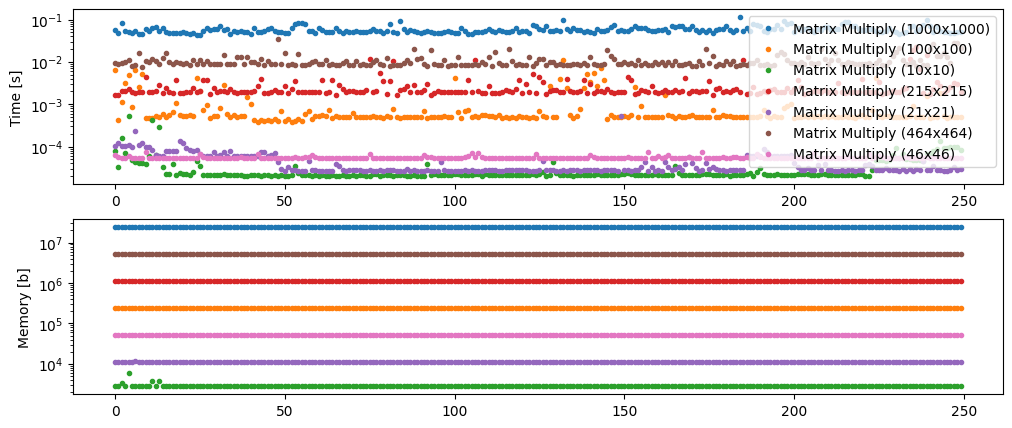

In [56]:
fig, ax_t, ax_m = plotResourceUsage(df)
ax_t.set_yscale("log")
ax_m.set_yscale("log")